In [173]:
import numpy as np
import pandas as pd
from numpy.random import random
import matplotlib.pyplot as plt
import torch
from matplotlib import animation, rc
rc('animation', html='jshtml')
def loss(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

def update_for_animation():
        global theta
        temp = X@theta - y
        temp = X.transpose(1,0)@temp
        theta = theta - (alpha/len(X)) * temp

def animate(i):
    update_for_animation()
    line.set_ydata(X@theta)
    return line,

# Bedeutung von Rechnerarchitekturen für das Maschinelle Lernen

    Dr.-Ing. Rüdiger Alshut

 <p style="font-size:35pt;"> Demonstration: Lineare Regression in Python </p>
  Vergleich CPU vs. GPU
 
<center>

 <img src="images/GeradenGleichung.png" alt="term-document matrix"  align="center" style="width: 50%"/> 
    </center>

In [168]:
w_tatsaechlich = np.array([[2],[5]])

n=1000
X = random(n)

X=X[:,np.newaxis];X = np.hstack((X,np.ones_like(X)));noise=np.random.normal(0,.4,n).reshape((n, 1))
print('X(1...3)=\n',X[:3],'\n');print('w=\n',w_tatsaechlich)

X(1...3)=
 [[0.34350606 1.        ]
 [0.64911816 1.        ]
 [0.48114502 1.        ]] 

w=
 [[2]
 [5]]


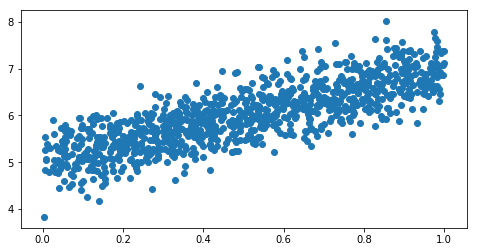

In [169]:
y = X@w_tatsaechlich
y=y+noise
plt.figure(figsize=(8,4));_ = plt.scatter(X[:,0],y)

<p style="font-size:35pt;"> Implementierung des Batch-Gradient-Descent Algorithmus</p>

<img src="images/GradienDescentOverview.png" alt="Vergleich Gradient Descent" style="width: 75%"/>
>Wiederhole:{
\begin{align*}\label{eq:GradienDescent_Wdh}
%\text{Wiederhole:}\{\quad\quad\quad\quad\quad\quad\\
\hat w_1 =& \, \hat w_1 - \alpha \frac{1}{m}\sum\limits_{i=1}^m(\hat y_i - y_i) x_i\\
\hat w_2 =& \, \hat w_2 - \alpha \frac{1}{m}\sum\limits_{i=1}^m(\hat y_i - y_i)
\end{align*}
}

Gradienten Abstiegsverfahren über $m$ Beispiele und den Parametern $(w_1,w_2)$ :

- Abschätzung der Gerade mit den derzeitigen Parametern:
\begin{align*}\label{eq:Abschaetzung}
\hat y=\hat w_1x+\hat w_2\\
\end{align*}
- Mit Lernrate: $\alpha = 0.1$
- Beispielanzahl $m=1000$
\vspace{1pt}

In [170]:
def gradientDescent(X, y, W, lernrate, iterations):
    for _ in range(iterations):
        y_dach = X@W - y
        gradienten = X.transpose(1,0) @ y_dach
        W = W - (lernrate/len(X)) * gradienten
    return W

## Vergleich der Laufzeit auf der CPU und auf der GPU

#### CPU:
- Intel i5-4210U (Bj. 2014) @ 1,7 GHz (max. 2,7 GHz)
- Cores: 2
- Speicher: 8 GB DDR 3
- Transistoren: 1400 Million

\vspace{1pt}

In [174]:
%%time
w = np.zeros([2,1])
iterations = 1000
alpha = 0.1
w = gradientDescent(X, y, w, alpha, iterations)
print("Beste Schätzung nach %s Durchläufen:\n w_1: %.3f \n w_2: %.3f\n" % (iterations,w[0],w[1]))

Beste Schätzung nach 1000 Durchläufen:
 w_1: 1.945 
 w_2: 5.028

Wall time: 49 ms


In [172]:

theta = np.zeros([2,1]);alpha = 0.01;fig = plt.figure();plt.scatter(X[:,0], y, c='orange');line, = plt.plot(X[:,0], X@theta);plt.close();theta = np.zeros([2,1]);animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=10) 

## Vergleich der Laufzeit auf der CPU und auf der GPU

#### CPU:
- Intel i5-4210U (Bj. 2014) @ 1,7 GHz (max. 2,7 GHz)
- Cores: 2
- Speicher: 8 GB DDR 3
- Transistoren: 1400 Million

#### GPU:
- Nvidia GTX 850 M @ 640 MHz (max 936 MHz)
- Cores: 640
- Speicher: 4GB DDR 3
- Transistoren: 1870 Millionen

In [175]:
%%time
w = np.zeros([2,1])
iterations = 1000
alpha = 0.1
w = gradientDescent(X, y, w, alpha, iterations)
print("Beste Schätzung nach %s Durchläufen:\n w_1: %.3f \n w_2: %.3f\n" % (iterations,w[0],w[1]))

Beste Schätzung nach 1000 Durchläufen:
 w_1: 1.945 
 w_2: 5.028

Wall time: 50 ms


In [157]:
%%time
w = np.zeros([2,1])
X_t=torch.from_numpy(X).cuda()
y_t=torch.from_numpy(y).cuda()
w_t = torch.from_numpy(w).cuda()
w = gradientDescent(X_t, y_t, w_t, alpha, iterations)
print("Beste Schätzung nach %s Durchläufen:\n w_1: %.3f \n w_2: %.3f\n" % (iterations,w[0],w[1]))

Beste Schätzung nach 1000 Durchläufen:
 w_1: 0.012 
 w_2: 5.969

Wall time: 1.12 s


#### Vorteil der GPU kommt erst bei ausreichend großen Matrizen zum Tragen

Wie die überwiegende Anzahl aller Algorithmen des maschinellen Lernens auch im Gradienten Abstieg:
- Viele Matrixmultiplikationen
- Viele Wiederholungen (während des Trainings)

In [161]:
def gradientDescent(X, y, W, lernrate, iterations):
    for _ in range(iterations):
        y_dach = X@W - y
        gradienten = X.transpose(1,0) @ y_dach
        W = W - (lernrate/len(X)) * gradienten
    return W

#### Demonstration am Beispiel einer Matrixmultiplikation

In [162]:
n=5000
a = np.random.rand(n,n)
b = np.random.rand(n,n)

In [163]:
MatrizenProdukt_CPU=0

In [164]:
MatrizenProdukt_GPU=0
a_t=torch.from_numpy(a.astype(np.float32)).cuda()
b_t=torch.from_numpy(b.astype(np.float32)).cuda()

In [165]:
%%time
MatrizenProdukt_CPU = a@b # no for-loops in vectorized version

Wall time: 6.79 s


In [166]:
%%time
MatrizenProdukt_GPU = a_t@b_t # no for-loops in vectorized version

Wall time: 14 ms
